## Basic Bayesian Optmization Demo

Demo of finding maximum of 1-D target function 

#### BayesianOptimization Library

https://github.com/fmfn/BayesianOptimization

In [8]:
# ! pip install bayesian-optimization

In [64]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

### Target Function

To demonstrate how bayesian optimization works let’s look at a basic toy example where we will look to find the maximum of a 1-D target function with multiple local maxima:

The target function we will try to maximize is the following:

$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^2 + 1}, $$ 

its maximum is at $x = 2$ and we will restrict the interval of interest to $x \in (-2, 10)$.

To note; in practice this function is unknown, and the only information we obtain is by sequentially probing it at different points.

Bayesian optimization works by constructing a posterior distribution of functions that best fit the data observed and choosing the next probing point by balancing exploration and exploitation


In [116]:
def target(x):
    """
    Define target function we want to find the maximum of
    """
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

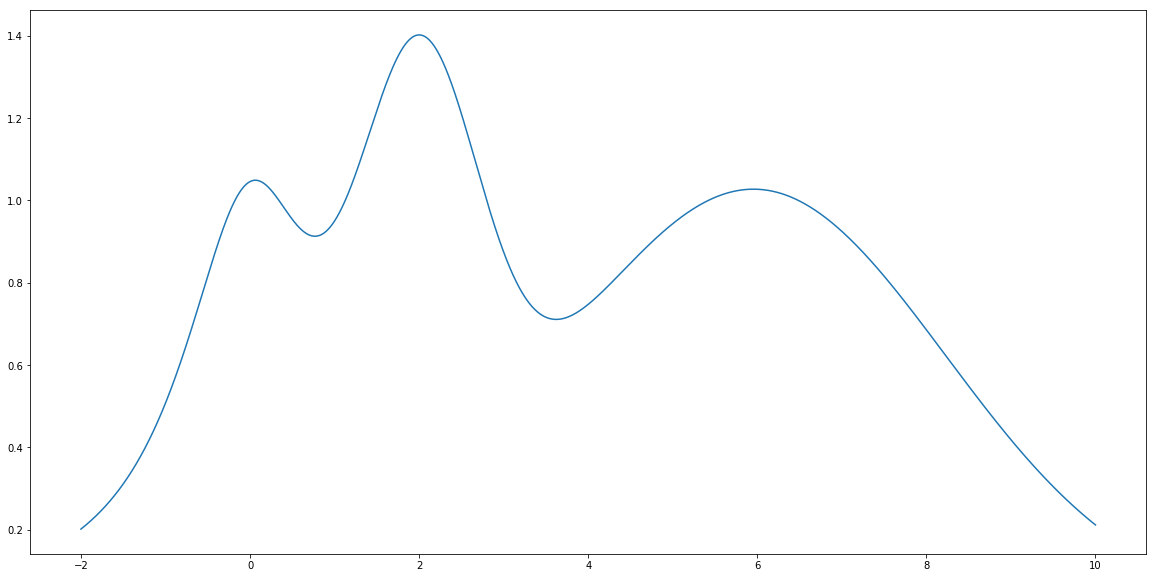

In [117]:
# Plot our target function

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.figure(figsize=(20,10))
plt.plot(x, y)

In [118]:
# Create a BayesianOptimization Object

bo = BayesianOptimization(target, {'x': (-2, 10)})

For this example we will use Expected Improvement as our utility function.

We will control the balance between exploration and exploitation with the $x_i$ parameter which we set close to 0 to favour exploitation.

In [119]:
# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

# Initialize by probing two random points
bo.maximize(init_points=2, n_iter=0, acq="ei", xi=1e-4, **gp_params)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.74196 |    7.7904 | 
    2 | 00m00s |    0.95445 |    1.0137 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


### Plotting and visualizing the algorithm at each step

In [120]:
def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

### Two random points

Start by probing two points at random, we can fit a Gaussian Process and start the bayesian optimization procedure. 

Two points should give us a uneventful posterior with the uncertainty growing as we go further from the observations.

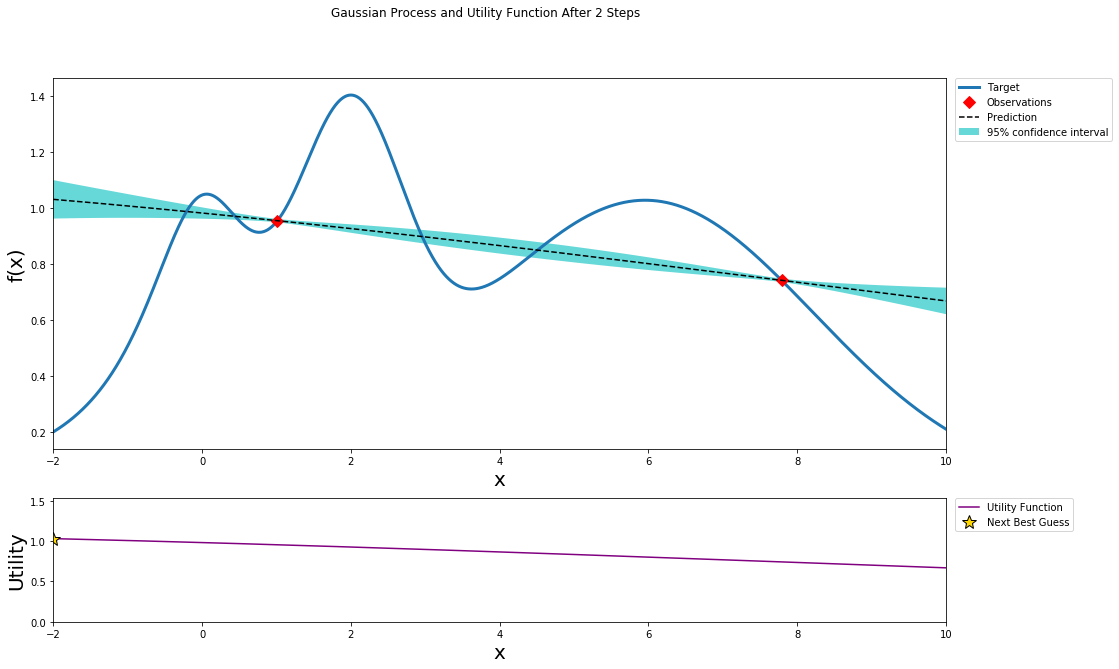

In [121]:
plot_gp(bo, x, y)

### After 1 step of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.20166 |   -2.0000 | 


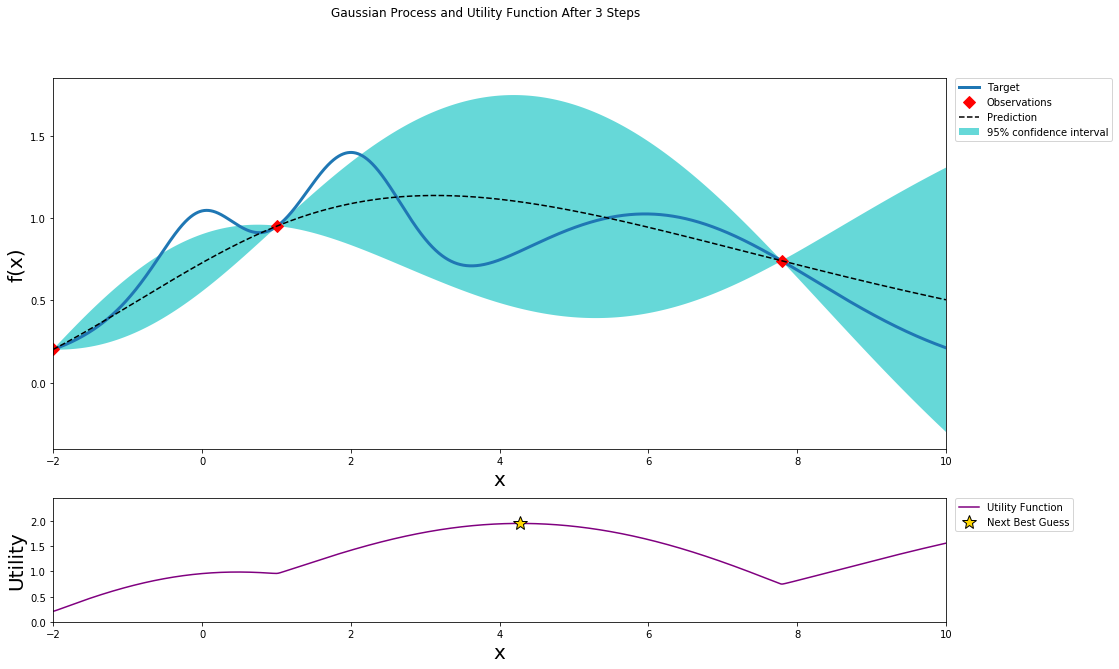

In [122]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 2 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m00s |    0.79966 |    4.2726 | 


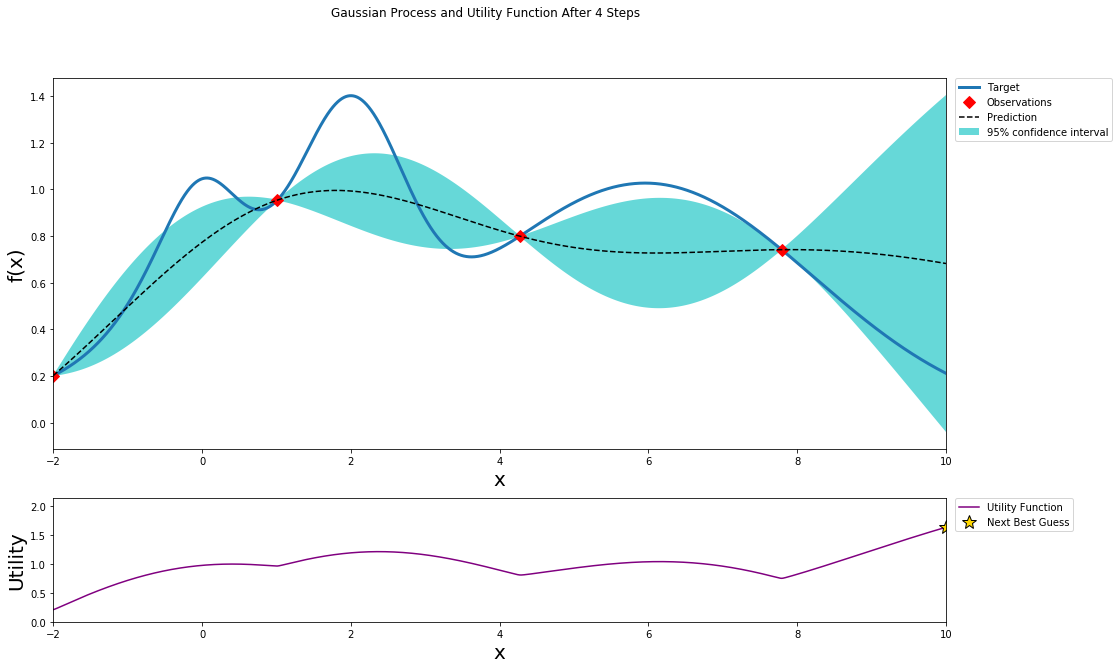

In [123]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 3 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    5 | 00m00s |    0.21180 |   10.0000 | 


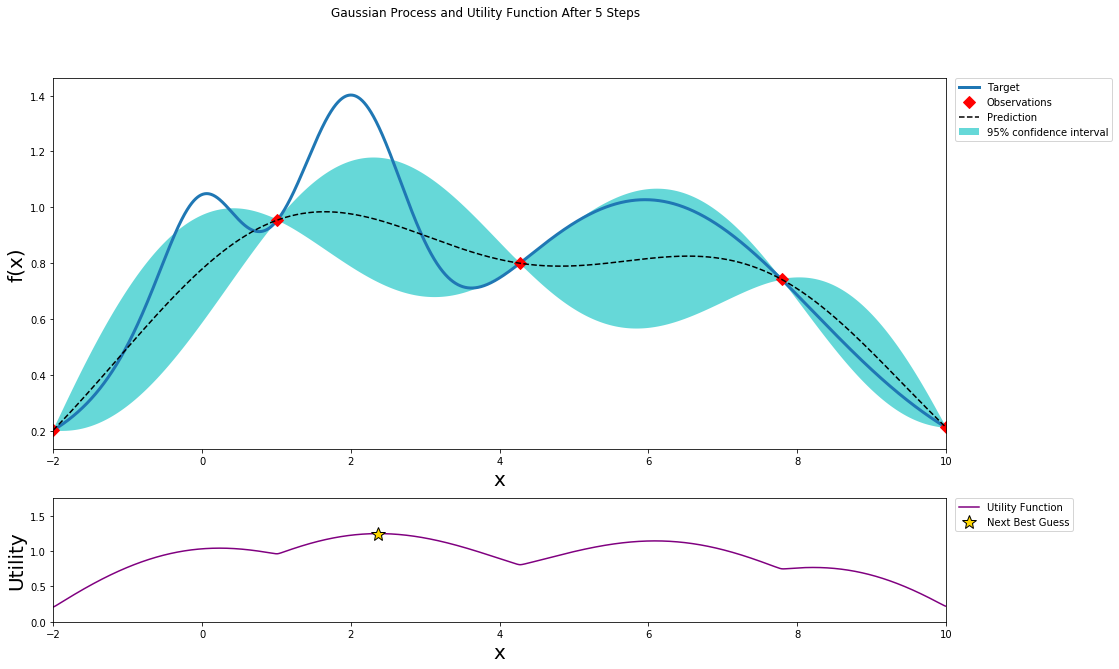

In [124]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 4 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    6 | 00m00s |    1.29077 |    2.3703 | 


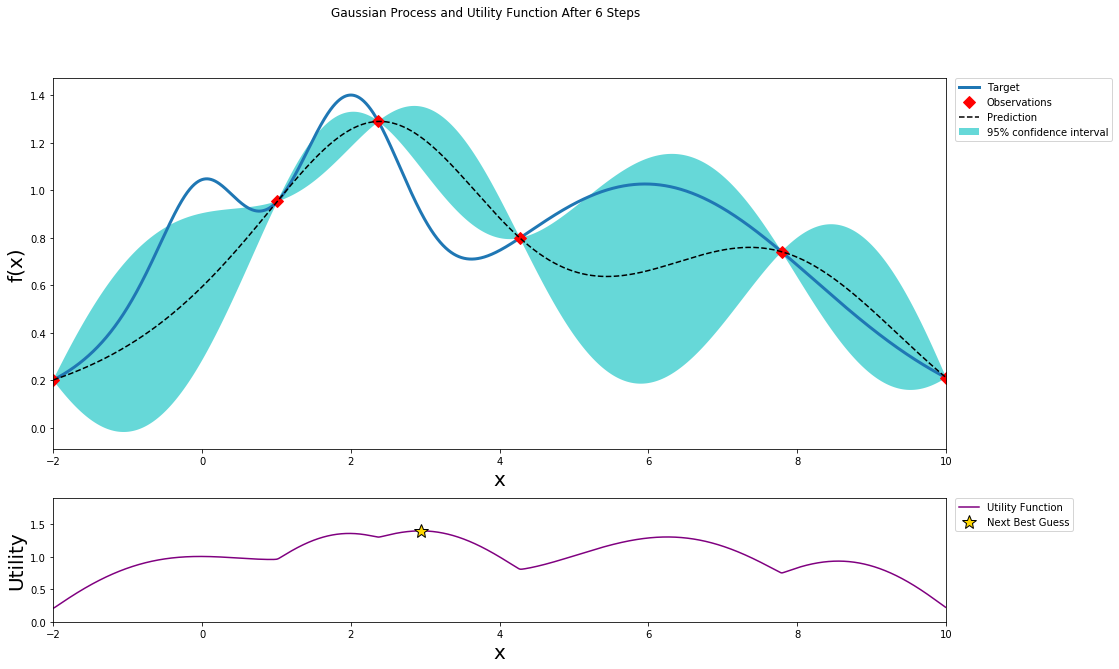

In [125]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 5 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    7 | 00m00s |    0.90969 |    2.9389 | 


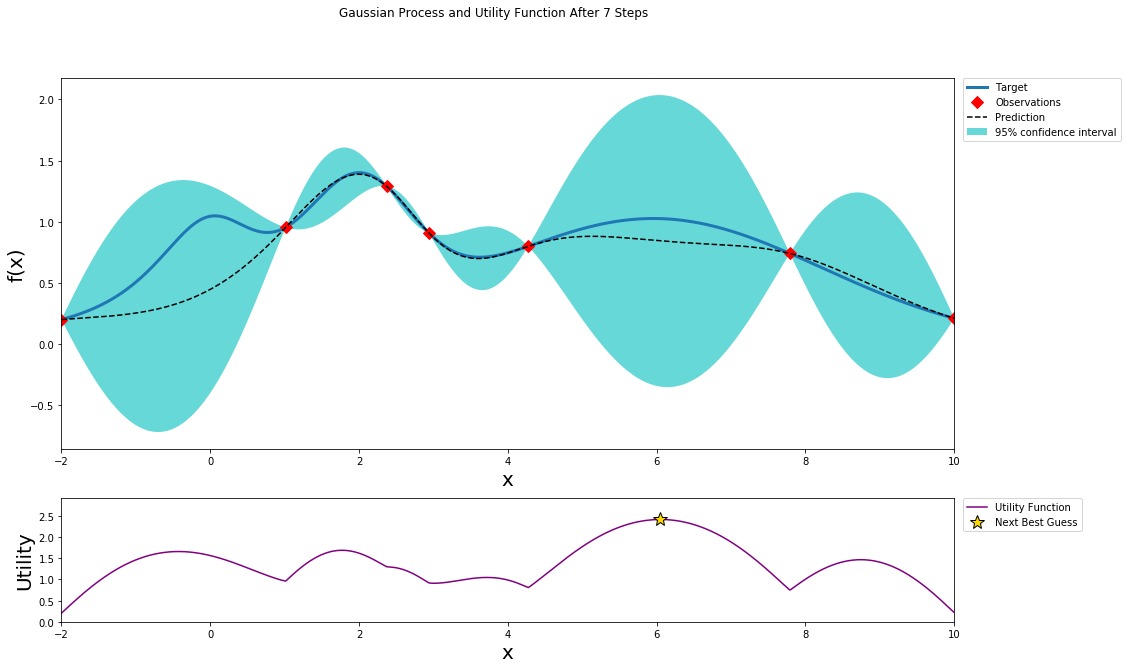

In [126]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 6 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    8 | 00m00s |    1.02632 |    6.0515 | 


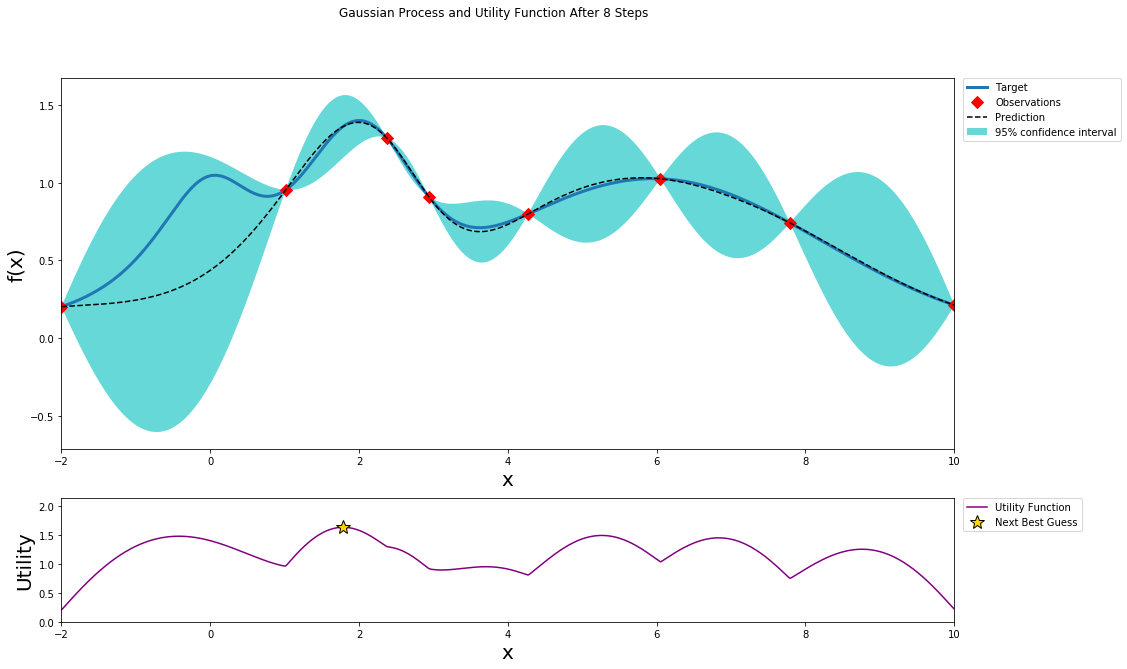

In [127]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 7 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    9 | 00m00s |    1.36347 |    1.7866 | 


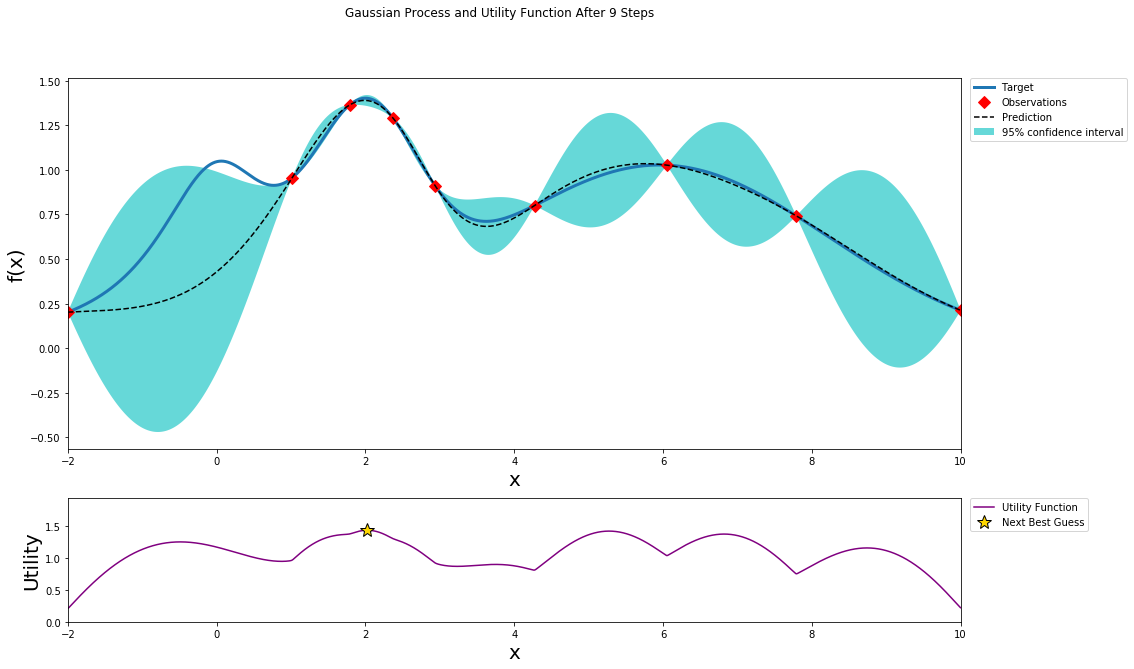

In [128]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 8 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   10 | 00m00s |    1.40138 |    2.0252 | 


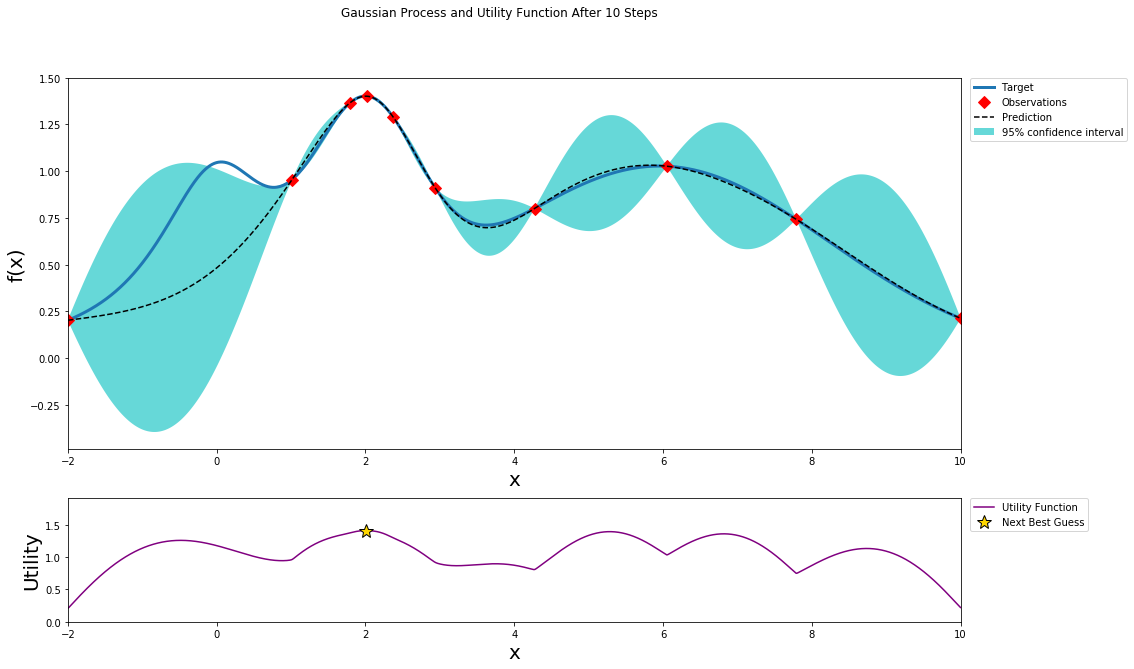

In [129]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 9 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   11 | 00m01s |    1.40189 |    2.0031 | 


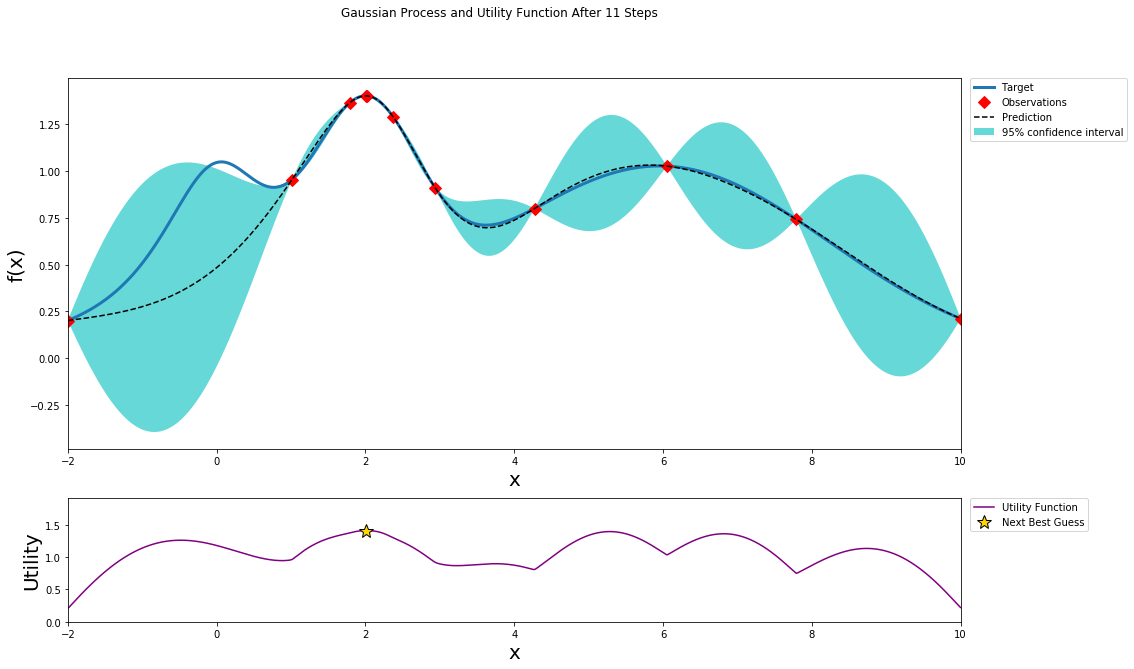

In [130]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 10 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   12 | 00m01s |    1.40189 |    2.0044 | 


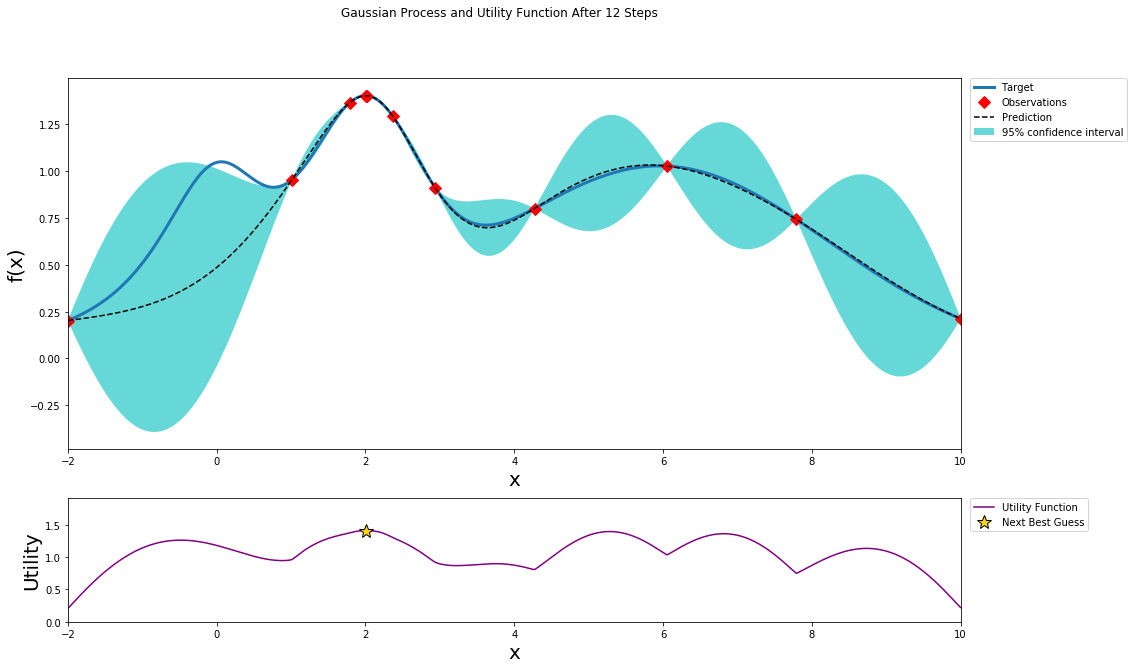

In [131]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 11 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   13 | 00m02s |    1.40188 |    2.0047 | 


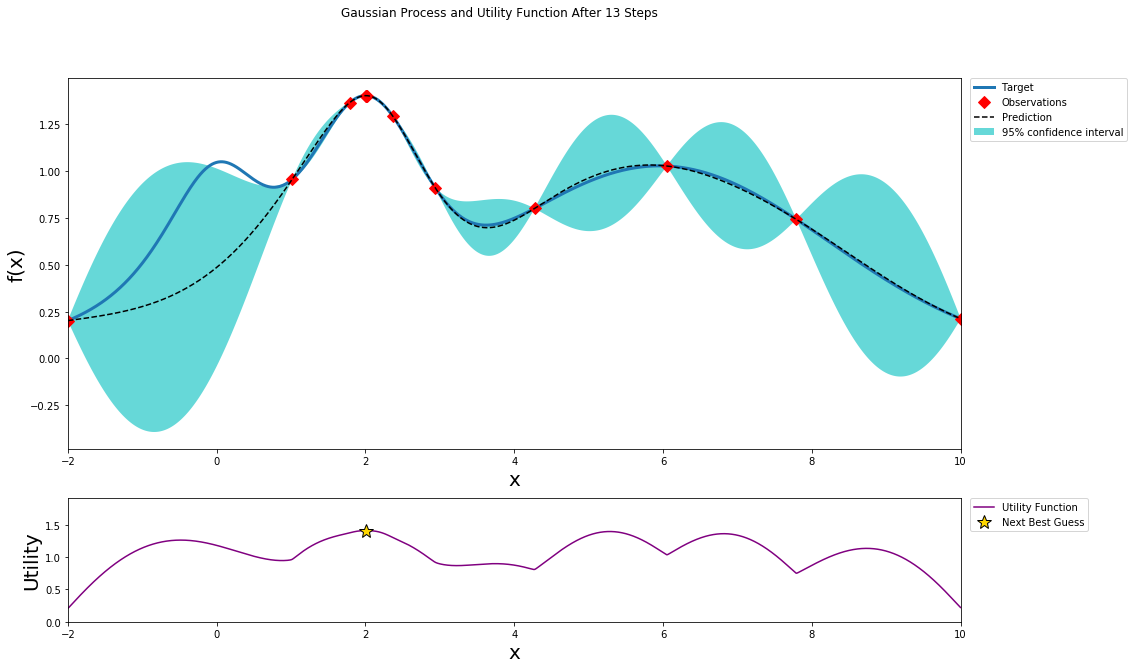

In [132]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### After 12 steps of GP (and two random points)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   14 | 00m02s |    1.40188 |    2.0055 | 


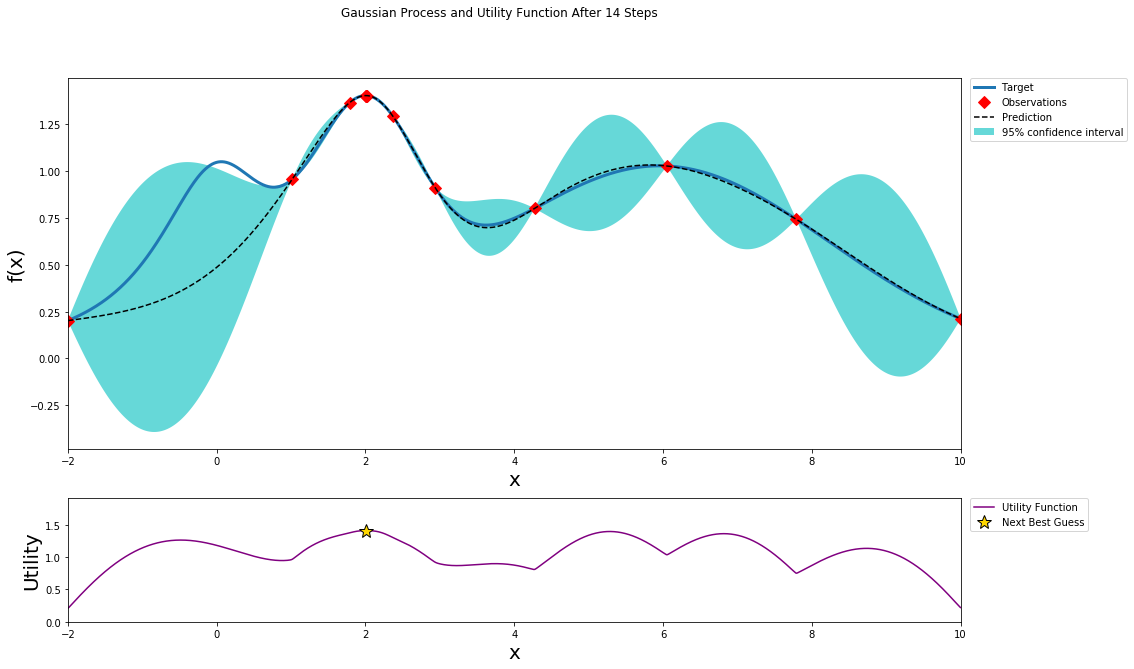

In [133]:
bo.maximize(init_points=0, n_iter=1, xi=1e-4)
plot_gp(bo, x, y)

### Stopping

After just 12 points the algorithm was able to get pretty close to the true maximum. 

It is important to notice that the trade off between exploration (exploring the parameter space) and exploitation (probing points near the current known maximum) is fundamental to a succesful bayesian optimization procedure. 

The utility function being used here (Expected Improvement (EI)) has the parameter $x_i$ that allows us to make the algorithm more or less conservative. Additionally, the larger the initial set of random points explored, the less likely the algorithm is to get stuck in local minima due to being too conservative.